# ML in data analysis
Using machine learning technologies to analyze data and make business recommendations.
The goal is to analyze and prepare an action plan for customer retention.

- learn how to predict the probability of outflow (at the level of the next month) for each client;
- form typical customer portraits: identify several of the most striking groups and characterize their main properties;
- analyze the main features that most strongly affect the outflow;
- formulate the main conclusions and develop recommendations for improving the quality of work with clients:
    1) identify target customer groups;
    2) propose measures to reduce churn;
    3) determine other features of interaction with customers.

Data discription:

- 'Churn' — outflow fact in the current month;

Current fields in the dataset:
        
User data for the previous month before checking the outflow fact:

- 'gender'

- 'Near_Location' - living or working in the area where the fitness center is located

- 'Partner' - an employee of the club's partner company (cooperation with companies whose employees can receive discounts for a subscription - in this case, the fitness center stores information about the client's employer)

- Promo_friends - the fact of the initial registration as part of the “bring a friend” promotion (used a promo code from a friend when paying for the first subscription)

- 'Phone' — availability of a contact phone number
- 'Age' — age
            
- 'Lifetime' - time since the first access to the fitness center (in months)

Information based on the history of visits, purchases and information about the current status of the client's subscription

- 'Contract_period' — duration of the current active subscription (month, 3 months, 6 months, year)
        
- 'Month_to_end_contract' — term until the end of the current active subscription (in months)
        
- 'Group_visits' — the fact of attending group classes

- 'Avg_class_frequency_total' — the average frequency of visits per week for the entire time since the start of the subscription
        
- 'Avg_class_frequency_current_month' — average frequency of visits per week for the previous month
        
- 'Avg_additional_charges_total' — total revenue from other services of the fitness center: cafe, sports goods, beauty and massage salon

# Step 1 - Data importing


In [27]:
# import libraries
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score,recall_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from IPython.display import display
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('use_inf_as_na', True)

In [28]:
# import data
try:
    path = 'data/'
    df = pd.read_csv(path + 'gym_churn.csv')
except FileNotFoundError as e:
    print(repr(e))

    df = pd.read_csv('/datasets/gym_churn.csv')

In [29]:
# let's print the size and first lines of the file

print(df.shape)
display(df.head(5))

(4000, 14)


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [30]:
# let's look at the summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

# Step 2 - Conduct Exploratory Data Analysis (EDA)

In [31]:
# Let's look at the dataset: are there missing features in it, study the means and standard deviations

df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


- standard deviations are not large,
- max too, 
- there are no outliers in the data

can continue working with these data.

In [32]:
# Let's look at the average values of the features in two groups - those who left in the outflow and those who remained

df.groupby('Churn').agg('mean')

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Clients with shorter contracts and younger than 27 usually leave

More often there are people around 30 with a long contract who came at the invitation of friends or companies.

The gender distribution is approximately equal

In [33]:
# Let's build bar graphs and feature distributions for those who left (churn) and those who stayed (didn't get into churn)

# select columns for drawing charts
cols = df.drop(columns = [
    'gender',
    'Near_Location',
    'Partner',
    'Promo_friends',
    'Phone',
    'Contract_period',
    'Group_visits',
    'Churn'
]).columns


OptionError: No such keys(s): 'mode.use_inf_as_null'

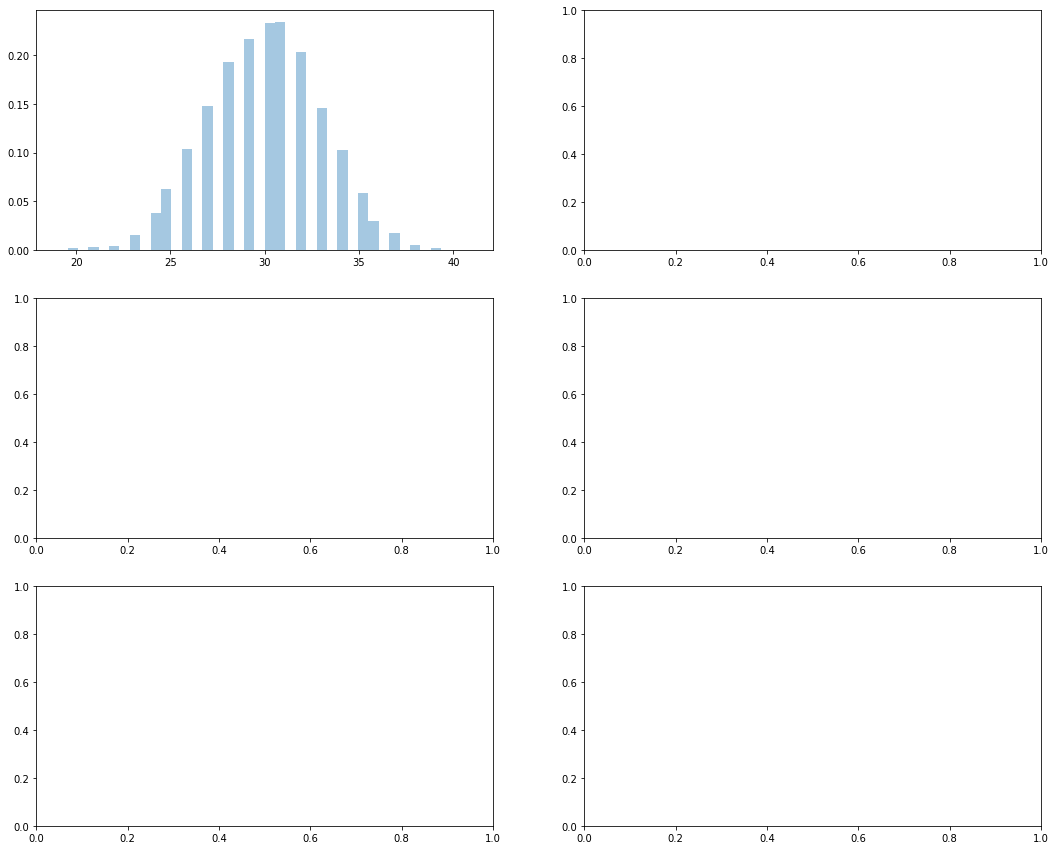

In [34]:

# set the chart size
fig, axes = plt.subplots(3,2, figsize = (18, 15))
axes = axes.ravel()

for col, ax in zip(cols, axes):
    sns.distplot(df[df['Churn'] == 0][col], ax = ax, label = 'Продлили')
    sns.distplot(df[df['Churn'] == 1][col], ax = ax, label = 'Ушли')
    ax.set_title(f'Распределение признака {col}', fontsize = 14)
    ax.legend()

fig.tight_layout()
plt.show()